In [125]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.calibration import calibration_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ml_insights as mli
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)



Starting off w/ just batting statistics (no pitching stuff just yet)
- On Base Percentage (last season avg and last 30 games)
- Slugging Percentage (last season avg and last 30 games) 

In [118]:
df = pd.read_csv("df_bp1.csv")
df_odds = df[(df.season > 2012) & (df.season <= 2021)]
df_odds.sample(5)

/var/folders/x4/9gxy2p1d4nd09kxmx07_g7b00000gn/T/ipykernel_5604/393615381.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_bp1.csv")


,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,runs_h,outs_total,day_night,completion_info,forfeit_info,protest_info,AB_v,H_v,2B_v,3B_v,HR_v,RBI_v,SH_v,SF_v,HBP_v,BB_v,IBB_v,SO_v,SB_v,CS_v,GIDP_v,CI_v,LOB_v,P_num_v,ERind_v,ERteam_v,WP_v,balk_v,PO_v,ASST_v,ERR_v,PB_v,DP_v,TP_v,AB_h,H_h,2B_h,3B_h,HR_h,RBI_h,SH_h,SF_h,HBP_h,BB_h,IBB_h,SO_h,SB_h,CS_h,GIDP_h,CI_h,LOB_h,P_num_h,ERind_h,ERteam_h,WP_h,balk_h,PO_h,ASST_h,ERR_h,PB_h,DP_h,TP_h,misc_info,acqui_info,season,run_diff,home_victory,run_total,date_dblhead,BATAVG_162_h,BATAVG_162_v,BATAVG_30_h,BATAVG_30_v,OBP_162_h,OBP_162_v,OBP_30_h,OBP_30_v,SLG_162_h,SLG_162_v,SLG_30_h,SLG_30_v,OBS_162_h,OBS_162_v,OBS_30_h,OBS_30_v,SB_162_h,SB_162_v,SB_30_h,SB_30_v,CS_162_h,CS_162_v,CS_30_h,CS_30_v,ERR_162_h,ERR_162_v,ERR_30_h,ERR_30_v,ML_h,ML_v,imp_prob_h,imp_prob_v,imp_prob_mid_h
8136,2013-05-22,0,Wed,CIN,NL,47,NYN,NL,44,7,4,54,D,NaN,NaN,NaN,38,12,4,0,1,7,0,0,0,5,3,8,0,0,1,0,9,4,4,4,0,0,27,10,1,0,1,0,34,9,5,1,0,4,1,1,0,2,0,6,0,0,1,0,7,4,7,7,0,0,27,11,0,0,1,0,NaN,Y,2013,-3,0,11,201305220,0.240388,0.254585,0.205617,0.244838,0.301985,0.319350,0.269373,0.322751,0.468693,0.495188,0.415246,0.462144,0.770678,0.814538,0.684618,0.784895,84.0,82.0,13.0,8.0,34.0,30.0,7.0,8.0,94.0,82.0,17.0,15.0,-118.0,-102.0,0.541284,0.504950,0.518167
28747,2021-08-08,0,Sun,ANA,AL,112,LAN,NL,112,2,8,51,D,NaN,NaN,NaN,34,7,3,0,0,2,0,0,0,5,0,12,0,0,0,0,10,4,8,8,0,0,24,6,0,0,0,0,36,11,3,0,2,8,0,0,1,3,2,7,3,0,0,0,8,4,2,2,0,0,27,9,0,0,0,0,NaN,Y,2021,6,1,10,202108080,0.248995,0.252376,0.261438,0.248766,0.325845,0.314511,0.318691,0.297970,0.540190,0.524671,0.547152,0.482725,0.866035,0.839182,0.865843,0.780695,62.0,64.0,13.0,15.0,15.0,25.0,0.0,8.0,104.0,100.0,23.0,18.0,-350.0,300.0,0.777778,0.250000,0.763889
10293,2014-04-20,0,Sun,ATL,NL,18,NYN,NL,18,3,4,83,D,NaN,NaN,NaN,49,10,3,1,0,2,0,0,0,5,1,14,0,1,2,0,9,6,3,3,1,0,41,16,3,0,2,0,49,9,0,0,0,4,1,1,1,4,1,11,1,0,2,0,11,7,3,3,0,0,42,13,1,0,2,0,NaN,Y,2014,1,1,7,201404200,0.233675,0.250183,0.225100,0.251232,0.297956,0.316825,0.294651,0.312217,0.427955,0.483163,0.385458,0.493596,0.725911,0.799988,0.680109,0.805813,121.0,67.0,33.0,18.0,39.0,31.0,7.0,5.0,89.0,85.0,13.0,21.0,-108.0,-102.0,0.519231,0.504950,0.507140
17888,2017-04-16,0,Sun,ANA,AL,13,KCA,AL,12,0,1,52,D,NaN,NaN,NaN,28,2,1,0,0,0,0,0,0,2,0,11,0,0,1,0,3,4,1,1,2,0,25,6,0,0,0,0,31,6,0,0,0,1,0,0,0,3,0,11,1,0,0,0,8,2,0,0,0,0,27,8,0,0,1,0,NaN,Y,2017,1,1,1,201704160,0.258187,0.262141,0.241276,0.245737,0.306613,0.320860,0.287453,0.315742,0.478017,0.493929,0.460618,0.455366,0.784630,0.814790,0.748071,0.771108,124.0,74.0,26.0,20.0,35.0,34.0,6.0,7.0,90.0,99.0,16.0,16.0,-112.0,102.0,0.528302,0.495050,0.516626
25840,2020-08-11,0,Tue,KCA,AL,18,CIN,NL,17,5,6,57,N,NaN,NaN,NaN,40,11,2,0,1,4,0,0,0,4,0,11,0,1,2,0,10,6,5,5,0,0,27,8,0,0,1,0,35,10,2,1,2,6,0,0,0,4,0,10,1,0,1,0,7,5,3,3,1,0,30,12,3,0,2,0,NaN,Y,2020,1,1,11,202008110,0.243517,0.248139,0.210905,0.263158,0.309088,0.303163,0.300820,0.311475,0.509840,0.489926,0.450617,0.529240,0.818928,0.793088,0.751438,0.840715,85.0,109.0,18.0,19.0,37.0,39.0,8.0,9.0,92.0,87.0,19.0,20.0,-172.0,161.0,0.632353,0.383142,0.624606


In [ ]:
features = ["OBP_162_h", "OBP_162_v", "SLG_162_h", "SLG_162_v"]

target = "home_victory"

X = df_odds.loc[:,features]
y = df_odds[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [120]:
print(X_train.head())

       OBP_162_h  OBP_162_v  SLG_162_h  SLG_162_v
17096   0.294047   0.322264   0.465232   0.536427
14173   0.316661   0.298684   0.454048   0.449397
28300   0.331750   0.311036   0.532402   0.497540
12226   0.317819   0.318864   0.470599   0.504399
8897    0.310859   0.301426   0.484960   0.483230


In [121]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5422582826233941


(array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 9.000e+00, 1.300e+01, 1.200e+01, 1.100e+01,
        2.500e+01, 3.300e+01, 4.500e+01, 6.900e+01, 8.500e+01, 9.800e+01,
        1.150e+02, 1.530e+02, 2.220e+02, 1.680e+02, 2.550e+02, 3.040e+02,
        3.180e+02, 3.950e+02, 4.200e+02, 4.250e+02, 4.040e+02, 7.000e+02,
        6.000e+02, 6.610e+02, 6.840e+02, 6.500e+02, 7.060e+02, 1.137e+03,
        7.670e+02, 8.050e+02, 9.130e+02, 8.610e+02, 1.178e+03, 6.780e+02,
        8.500e+02, 8.610e+02, 7.580e+02, 7.790e+02, 7.730e+02, 7.190e+02,
        5.380e+02, 7.120e+02, 3.390e+02, 3.830e+02, 2.460e+02, 2.840e+02,
        1.800e+02, 2.370e+02, 1.310e+02, 1.420e+02, 1.040e+02, 6.900e+01,
        5.100e+01, 4.900e+01, 1.900e+01, 1.600e+01, 8.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00]),
 array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25,
        0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.

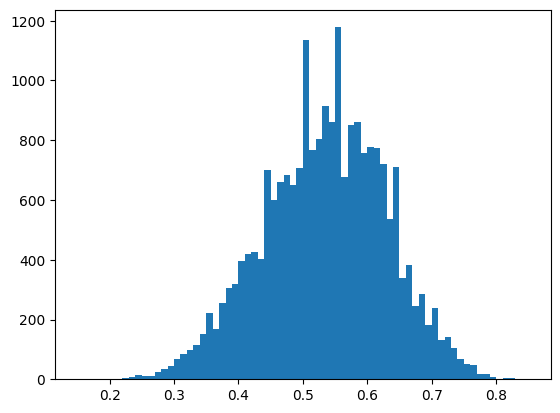

In [122]:
# Shape of what the Vegas odds are for the games
plt.hist(df_odds.imp_prob_mid_h, bins=np.linspace(.15,.85,71))

(array([1.900e+01, 1.200e+01, 4.000e+00, 6.000e+00, 4.000e+00, 1.000e+00,
        7.000e+00, 8.000e+00, 1.000e+01, 4.000e+00, 9.000e+00, 1.300e+01,
        8.000e+00, 6.000e+00, 3.310e+02, 4.250e+02, 5.510e+02, 4.150e+02,
        5.490e+02, 8.130e+02, 1.496e+03, 1.428e+03, 1.912e+03, 1.914e+03,
        2.232e+03, 9.380e+02, 9.660e+02, 1.247e+03, 7.390e+02, 1.154e+03,
        6.300e+02, 1.960e+02, 2.840e+02, 3.220e+02, 4.140e+02, 2.410e+02,
        2.230e+02, 3.330e+02, 1.270e+02, 2.070e+02, 8.000e+01, 8.800e+01,
        1.050e+02, 8.100e+01, 9.500e+01, 1.210e+02, 1.180e+02, 3.710e+02,
        6.000e+00, 6.000e+00, 4.000e+00, 1.100e+01, 6.000e+00, 0.000e+00,
        6.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 9.000e+00, 2.000e+00]),
 array([1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, 1.007, 1.008,
        1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015, 1.016, 1.017,
        1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024, 1.025, 1.026,
        1.027, 1.028, 1.029, 1.03 , 1.031, 1.

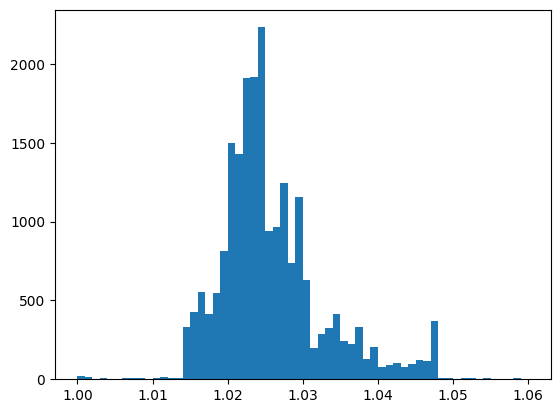

In [123]:
# Visualize the vig on Vegas' odds and how they always have an edge of 2% on any side of a bet
plt.hist(df_odds.imp_prob_h + df_odds.imp_prob_v, bins=np.linspace(1,1.06,61))

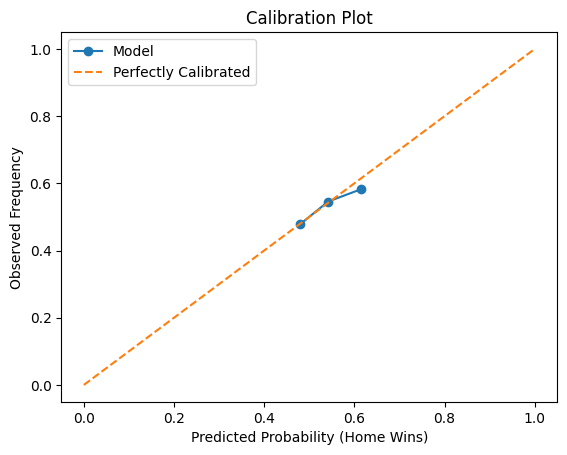

In [126]:
y_prob = model.predict_proba(X_test)[:, 1]  # probability home team wins


prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability (Home Wins)')
plt.ylabel('Observed Frequency')
plt.title('Calibration Plot')
plt.legend()
plt.show()


- model predicts most games with probabilities between ~0.45 and ~0.6
- predictions are fairly well-calibrated b/c  blue line closely follows the orange one
- model doesn’t make extreme predictions (close to 0 or 1), common in logistic regression unless strong features are present

In [ ]:
def american_odds_to_decimal(odds):
    if odds > 0:
        return 1 + odds / 100
    else:
        return 1 + 100 / abs(odds)

def simulate_bets(df, model_probs, home_odds, away_odds, outcomes, threshold=0.05, bet_amount=100):

    total_profit = 0
    bet_results = []

    for p_model, ml_h, ml_v, result in zip(model_probs, home_odds, away_odds, outcomes):
        p_market_h = american_odds_to_decimal(ml_v) ** -1
        p_market_v = american_odds_to_decimal(ml_h) ** -1

        # bet on home if model's probability is significantly greater than market's
        if p_model - p_market_h > threshold:
            odds_decimal = american_odds_to_decimal(ml_h)
            if result == 1:  # Home team won
                profit = bet_amount * (odds_decimal - 1)
            else:
                profit = -bet_amount
            bet_results.append(profit)
            total_profit += profit

        # bet on away if model's probability for home is significantly *lower* than market
        elif (1 - p_model) - p_market_v > threshold:
            odds_decimal = american_odds_to_decimal(ml_v)
            if result == 0:
                profit = bet_amount * (odds_decimal - 1)
            else:
                profit = -bet_amount
            bet_results.append(profit)
            total_profit += profit

        else:
            continue

    return {
        "total_profit": total_profit,
        "num_bets": len(bet_results),
        "avg_profit_per_bet": total_profit / len(bet_results) if bet_results else 0,
        "cumulative_returns": bet_results
    }

X_test = X_test.copy()
X_test["y_true"] = y_test
X_test["y_prob"] = y_prob

X_test["index"] = X_test.index
odds_cols = ["ML_h", "ML_v"]
X_test = X_test.merge(df_odds[odds_cols], left_on="index", right_index=True, how="left")

results = simulate_bets(
    df=X_test,
    model_probs=X_test["y_prob"],
    home_odds=X_test["ML_h"],
    away_odds=X_test["ML_v"],
    outcomes=X_test["y_true"],
    threshold=0.05,       
    bet_amount=100
)

print(results)

{'total_profit': -12111.580618052223, 'num_bets': 2952, 'avg_profit_per_bet': -4.102838962754818, 'cumulative_returns': [58.13953488372094, 65.78947368421053, 32.258064516129025, 54.64480874316941, -100, 31.25, 77.51937984496125, 73.52941176470588, 61.34969325153374, 35.97122302158273, -100, -100, -100, 64.51612903225805, -100, 60.606060606060595, -100, 54.64480874316941, -100, 47.61904761904763, -100, -100, -100, 65.359477124183, 58.13953488372094, -100, -100, -100, 70.4225352112676, 39.2156862745098, -100, 74.07407407407408, -100, 51.28205128205128, -100, -100, -100, 35.08771929824561, 60.606060606060595, 76.92307692307692, 60.97560975609757, 89.28571428571428, 46.94835680751175, -100, 50.0, -100, 58.82352941176472, 81.30081300813008, 50.0, 43.47826086956521, 50.0, -100, 45.45454545454546, 40.322580645161295, 60.24096385542168, -100, -100, -100, 54.054054054054056, -100, -100, 65.359477124183, 125.0, 42.553191489361694, 48.78048780487805, -100, -100, -100, 62.5, -100, -100, 54.054054